# ASSIGNMENT 1: signals, sampling and quantization

Many real-world systems measure and process signals. Examples include audio recordings, biomedical sensors (ECG, PPG, accelerometers), images, and wireless communication signals. In a computer, these signals are stored and processed as **discrete sequences** (arrays). This assignment introduces three basic steps that are behind most digital signal processing pipelines:

Sampling converts a continuous-time signal into a sequence of samples taken at discrete time instants. If the sampling frequency is too low, the sampled signal can represent a different frequency content than the original signal, which is known as **aliasing**. In practice, sampling choices affect quality, storage, and computation. This is easy to observe in audio: the same recording sounds different when stored at lower sampling rates.

Quantization maps continuous amplitude values into a finite set of discrete levels. Lower bit depth reduces the number of available levels and increases quantization error. In practice, quantization affects audio quality, sensor precision, and bandwidth requirements in digital transmission.

A key theme in this assignment is **visualization**. Discrete-time signals are best inspected by plotting samples and their indices (or time values). You will generate an impulse and a sine wave, plot them, change sampling parameters, and compare the original and quantized signals side by side to see the effect directly.

In this assignment you will:
- represent signals as NumPy arrays and plot them with Matplotlib
- implement simple signal generation functions
- examine sampling and aliasing through audio examples
- quantize a sine wave and compare the quantized and original signals


## Signal models for this assignment: impulse and sine wave

In the tasks below you will generate and visualize two basic signals that are widely used in digital signal processing:

- an **impulse** (discrete-time delta), which is a standard test signal and a useful building block
- a **sine wave**, which is a basic periodic signal used to study frequency and sampling effects

We start by writing these signals as mathematical definitions (continuous time and discrete time). After that, you will implement them as NumPy arrays and plot them.

### Impulse (Dirac delta)

Dirac’s delta function describes an impulse that is defined as

$\delta\left(t-t_{0}\right)=\left\{\begin{array}{ll}{1} & {t=t_{0}} \\ {0} & {t \neq t_{0}}\end{array}\right. \quad \text{(1-1)}$

where $t$ is a continuous time variable and $t_0$ is the delay of the impulse. The continuous-time impulse function cannot be established because it contains infinite frequencies. In discrete cases the impulse function is possible to be formed and it is defined as

$\delta\left(n-n_{0}\right)=\left\{\begin{array}{ll}{1} & {n=n_{0}} \\ {0} & {n \neq n_{0}}\end{array}\right. \quad \text{(1-2)}$

where $n$ is discrete time for sampling and $n_0$ is the delay of the impulse.

### Sine wave

An analogue sine wave is defined as

$x(t)=A \sin \left(\omega_{0} t+\Phi\right)=A \sin \left(2 \pi f_{0} t+\Phi\right) \quad \text{(1-3)}$

where $A$, $\omega_0$, $\Phi$ and $f_0$ are the signal amplitude, angular frequency, phase, and frequency (Hz), respectively. When samples are taken at the moments $t = nT$, a discrete signal is defined as

$x(n)=A \sin \left(2 \pi f_{0} nT+\Phi\right) \quad \text{(1-4)}$


Start by running the code block below to load the Python packages required to complete this assignment. To run the code, select the code block and push Ctrl+Enter or click the Run button.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Task 1.1** Generate an impulse function with delay with the command
```python
d = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
```
Plot your impulse with the command
```python
plt.stem(d)
```

<StemContainer object of 3 artists>

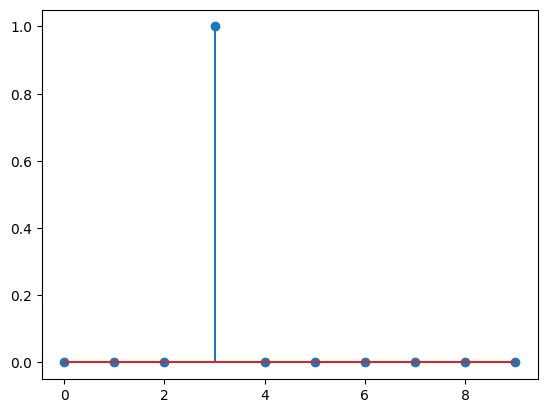

In [2]:
# enter your code here
d = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
plt.stem(d)

Writing the signal to an array by hand is slow. A better way to define signals is to make functions that generate them. Python's NumPy library has some built-in functions that can be used, *sin* and *cos*. You can also use a text editor or the code cells in Jupyter notebook to write your own functions that use these built-in resources. Functions accept input arguments, and they can return
output values. The function *sin_gen1* for creating a basic ‘analogue look’ sine wave s is presented next. The function *sin_gen1* creates a signal s with amplitude A, normalized frequency $f_n$ ($f_n=f_0/f_s$ and is in range [0, 1]), length in samples <b>L</b> and phase **fii**. The function returns s and <b>A</b>, <b>fn</b>, <b>L</b> and <b>fii</b> are given as input parameters. The function also plots the signal. The function code is the following:

In [3]:
def sin_gen1(A, fn, L, fii):
    """
    Generate and plot a sinusoidal signal.
    
    Parameters:
    A :   amplitude
    fn :  normalized signal frequency (sampling freq. fs = 1)
    L :   length of signal in samples
    fii : phase angle
    
    Returns:
    s sine signal values
    """
    n = np.arange(0, L)  # an array containing values 0…L-1
    s = A * np.sin(2*np.pi*fn*n + fii)  # calculates the sine values
    plt.plot(n, s) # creates a plot
    return s

In Python you can add comment lines by starting the line with a `#`. 

The first lines of a function in Python should contain a documentation string (a.k.a. docstring) surrounded by triple double quotes. The docstring explains the purpose of the function as well as how to use it.

Once the function sin_gen1 has been defined, the function can be used with the command

```python
s = sin_gen1(A, fn, L, fii)
```

After this s can be used in the workspace.

Test the function described above using different input parameters <b>A</b>, <b>fn</b>, <b>L</b> and <b>fii</b>:

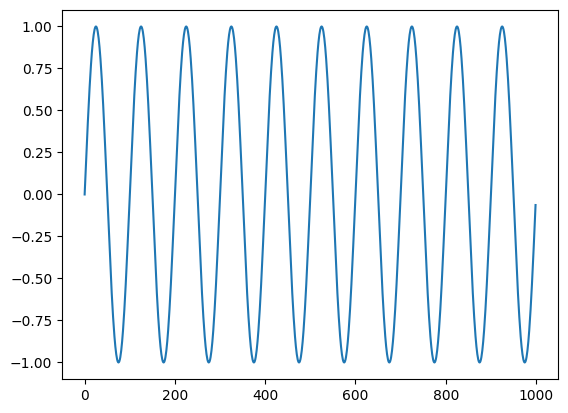

In [4]:
# enter your code here
s = sin_gen1(1, 0.01, 1e3, 0)

**Task 1.2.** Create a second function that generates a discrete-time sine wave, similar to equation (1-4). Amplitude <b>A</b>, signal frequency <b>f0</b>, sampling frequency <b>fs</b>, signal length in seconds <b>t</b> and phase <b>fii</b> should be inputs to the function. Write your code in the function sin_gen2 below. You must generate an array `n` that contains the sampling instants (times of samples). The samples are separated by the time Ts=1/fs. `n = np.arange(0, t+Ts, Ts)` creates an array that contains the values 0…t with increments of Ts. The function should also include an option to plot the generated signal. When the parameter `plot` is set to `True`, the function should plot the generated signal using stem and place the right values to the time-axis in seconds and label the axis. This can be done with the following code:
```python
if plot:
    fig, ax = plt.subplots()
    ax.stem(n, s)
    ax.set_xlabel('time (s)')
```

In [5]:
def sin_gen2(A, f0, fs, t, fii, plot=False):
    """
    Generate and plot a discrete-time sine wave.
    
    Parameters:
    A :   amplitude
    f0 :  signal frequency in Hertz
    fs :  sampling frequency in Hertz
    t :   signal length in seconds
    fii : phase angle
    plot : whether the signal should be plotted
    
    Returns:
    s sinusoidal signal vector
    """
    # implement the function as described above
    Ts = 1 / fs
    n = np.arange(0, t+Ts, Ts)
    s = A * np.sin(2*np.pi*f0*n + fii)
    if plot:
        fig, ax = plt.subplots()
        ax.stem(n, s)
        ax.set_xlabel('time (s)')
    return s

Test that your function works by using the values: A = 1, f0 = 800 Hz, fs = 8 kHz, t = 5ms and fii = π/2. Set the parameter `plot` to `True` in the function call to plot the signal.

array([ 1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
       -1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699,
        1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
       -1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699,
        1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
       -1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699,
        1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
       -1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699,
        1.        ])

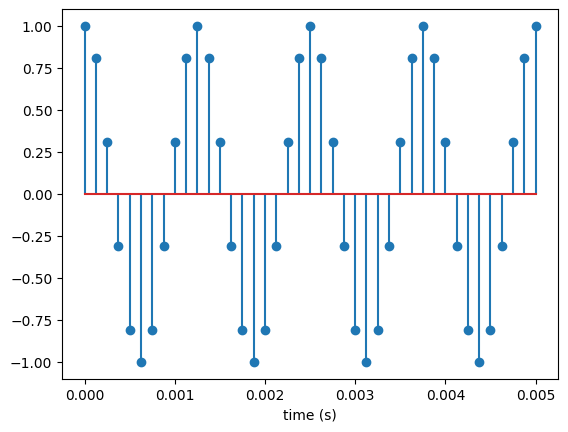

In [6]:
# call the function here
sin_gen2(1, 800, 8e3, 5e-3, np.pi/2, True)

## Sampling and aliasing
Let an analogue signal have its biggest frequency component $f_{max}$. According to Nyquist sampling theorem, the signal has to be sampled at least at the frequency $2 f_{max}$ in order to reconstruct the signal completely. If the sampling frequency is below $2 f_{max}$, the aliasing effect will occur and distort the signal and its spectrum, which means that some data is permanently lost. An analogue signal is usually filtered with an anti-aliasing filter before sampling.

**Task 1.3** Listen to the audio samples from Moodle which are sampled with frequencies 44100 (MyInsaneFriend44100.wav), 22050 (MyInsaneFriend22050.wav), 11025 (MyInsaneFriend11025.wav) and 5512 (MyInsaneFriend5512.wav) Hz (music from www.ee.oulu.fi/~sunday/Amplifear).

**What happens to the low and high frequencies and the music quality when the sampling frequency is lowered?**

`* In lower sampling frequency, low frequencies are not affected as they are below the sampling frequency, but high frequencies are aliased resulting in distortion. In higher sampling frequencies, more of higher frequencies are covered reducing distortion so music quality also improves. *`

## Quantization
In the A/D-conversion of a signal, both time discretization and amplitude discretization are done. The accuracy of the result depends on the system specifications. Let’s study a system with 4-bit accuracy. If the signal input to this system is a sine wave with an amplitude of one, then peak-to-peak amplitude $V_{fs} = 2$. In a 4-bit system there will be $2^B = 2^4 = 16$ different quantization levels, and $2^B–1 = 15$ steps between levels. This causes the quantization step length to be $V_{fs}$/number of steps = 2/15 = 0.1333.

**Task 1.4.** Use the function sin_gen1 with parameters A=1, fn =0.01, L=100, and fii=0 to create a sine wave s. Quantize the sine wave to a 2-bit representation using
```python
s2 = uencode(s, 2)
```
Plot the resulting and original sine wave to the same sheet using, for example, the function *subplots* or *subplot*.

In [7]:
def uencode(s, b):
    """Represent the values in s using b bits by employing rounding quantization."""
    return (((s-s.min()) / (s.max()-s.min())) * (2**b - 1)).round().astype('uint')

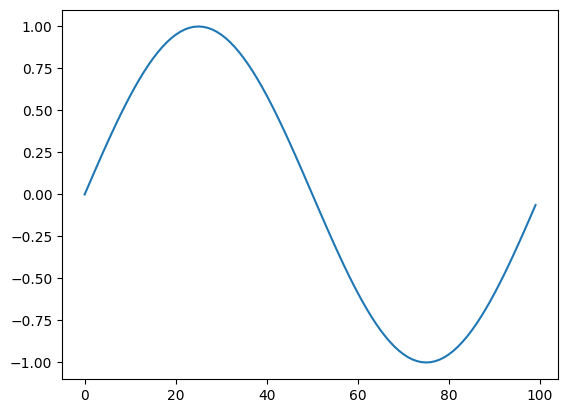

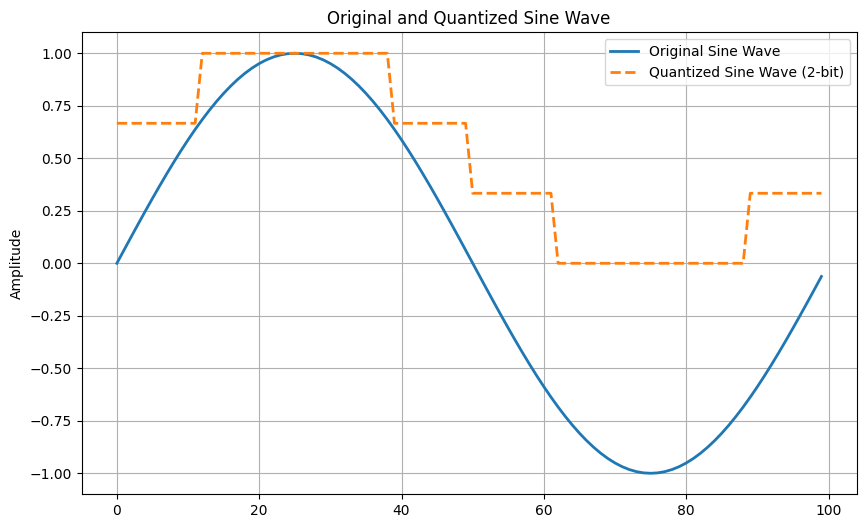

In [8]:
# generate the signal s by using sin_gen1
s = sin_gen1(1, 0.01, 100, 0)

# create s2 by quantizing s
s2 = uencode(s, 2)

# plot s and s2
plt.figure(figsize=(10, 6))
plt.plot(s, label='Original Sine Wave', linestyle='-', linewidth=2)
plt.plot(s2 / (2**2 - 1), label='Quantized Sine Wave (2-bit)', linestyle='--', linewidth=2)
plt.title('Original and Quantized Sine Wave')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## Short reflection (recommended, 3 to 6 sentences in total)

Answer the questions briefly. The aim is to connect the tasks to the main ideas of sampling and quantization.

1. In your own words, what is the difference between a continuous-time sine wave and its discrete-time version in this assignment? Why is a stem plot often more informative than a line plot for discrete-time signals?

2. When listening to the audio samples at lower sampling rates, what changed first: high frequencies, low frequencies, or both? Explain your observation using the Nyquist sampling idea.

3. In the quantization task, where do you see the largest differences between the original signal and the quantized signal? How does the number of bits affect this difference?

Optional (one sentence):
- What did you do to verify that your results are correct (for example, rerunning from scratch, checking axis labels, comparing with expected periods)?


> Solution:

1. A continious-time sine wave represents values for it at any time $t$, while the discrete-time depends on a finite samples of the signal. The continious-time represents an analog signal and the discrete time can represent a digital signal. In discrete-time signals, the stem plot can show us the distribution and shape of the signal better than a line plot.

2. When listening the the audio samples at the lower sampling rates, the high frequencies changed first, as they were above the Nquist sample rate. Since we are measuring the signal too slowly, the high frequency are being aliased according to the Nyquist Sampling Theorem which mentions sampling rate must be greater than at least twice the highest frequencies available in the signal.

3. In the Quantization exercise the highest difference was when the original signal was in the negative peaks, because in our quantization we are not defining how to handle negative values. Our measurements are limited between 0 and positive axis with a 2 bit limitation.

### Instructions for submission
1. Make sure that your code produces the desired results from scratch by selecting Kernel -> Restart & Run all. This will clear the output of your code and run all the code cells again from top to bottom. Also make sure that you have answered all the questions highlighted in **bold**.

2. Rename this notebook to `DF_Assignment1_firstname_lastname_studentnumber.ipynb` (e.g. DF_Assignment1_John_Smith_1234567.ipynb).

3. Submit only the resulting notebook (.ipynb file) to the return box in Moodle. Send your submission before the deadline to receive additional week exam points. Late submissions must be returned to a separate return box.